In [1]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Tuple
import math
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问

## 观察数据

In [ ]:
df_train = pd.read_csv("train.csv")
display(df_train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
## 数据类型
p = df_train.dtypes.to_dict() 
dtype_col:Dict[str, List[str]] = dict()
for ele in set(p.values()):
    temp = []
    ele = str(ele)
    for key in p.keys():
        if p[key] == ele:
            temp.append(key)
    dtype_col[ele] = temp
    print(ele, len(temp), temp)

{'Id': dtype('int64'), 'MSSubClass': dtype('int64'), 'MSZoning': dtype('O'), 'LotFrontage': dtype('float64'), 'LotArea': dtype('int64'), 'Street': dtype('O'), 'Alley': dtype('O'), 'LotShape': dtype('O'), 'LandContour': dtype('O'), 'Utilities': dtype('O'), 'LotConfig': dtype('O'), 'LandSlope': dtype('O'), 'Neighborhood': dtype('O'), 'Condition1': dtype('O'), 'Condition2': dtype('O'), 'BldgType': dtype('O'), 'HouseStyle': dtype('O'), 'OverallQual': dtype('int64'), 'OverallCond': dtype('int64'), 'YearBuilt': dtype('int64'), 'YearRemodAdd': dtype('int64'), 'RoofStyle': dtype('O'), 'RoofMatl': dtype('O'), 'Exterior1st': dtype('O'), 'Exterior2nd': dtype('O'), 'MasVnrType': dtype('O'), 'MasVnrArea': dtype('float64'), 'ExterQual': dtype('O'), 'ExterCond': dtype('O'), 'Foundation': dtype('O'), 'BsmtQual': dtype('O'), 'BsmtCond': dtype('O'), 'BsmtExposure': dtype('O'), 'BsmtFinType1': dtype('O'), 'BsmtFinSF1': dtype('int64'), 'BsmtFinType2': dtype('O'), 'BsmtFinSF2': dtype('int64'), 'BsmtUnfSF':

In [4]:
type_col:Dict[str, List[str]] = dict()
type_col['continue'] = dtype_col['int64'] + dtype_col['float64']
type_col['discrete'] = dtype_col['object']
print(len(type_col['continue']), type_col['continue'])
print(len(type_col['discrete']), type_col['discrete'])

38 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',

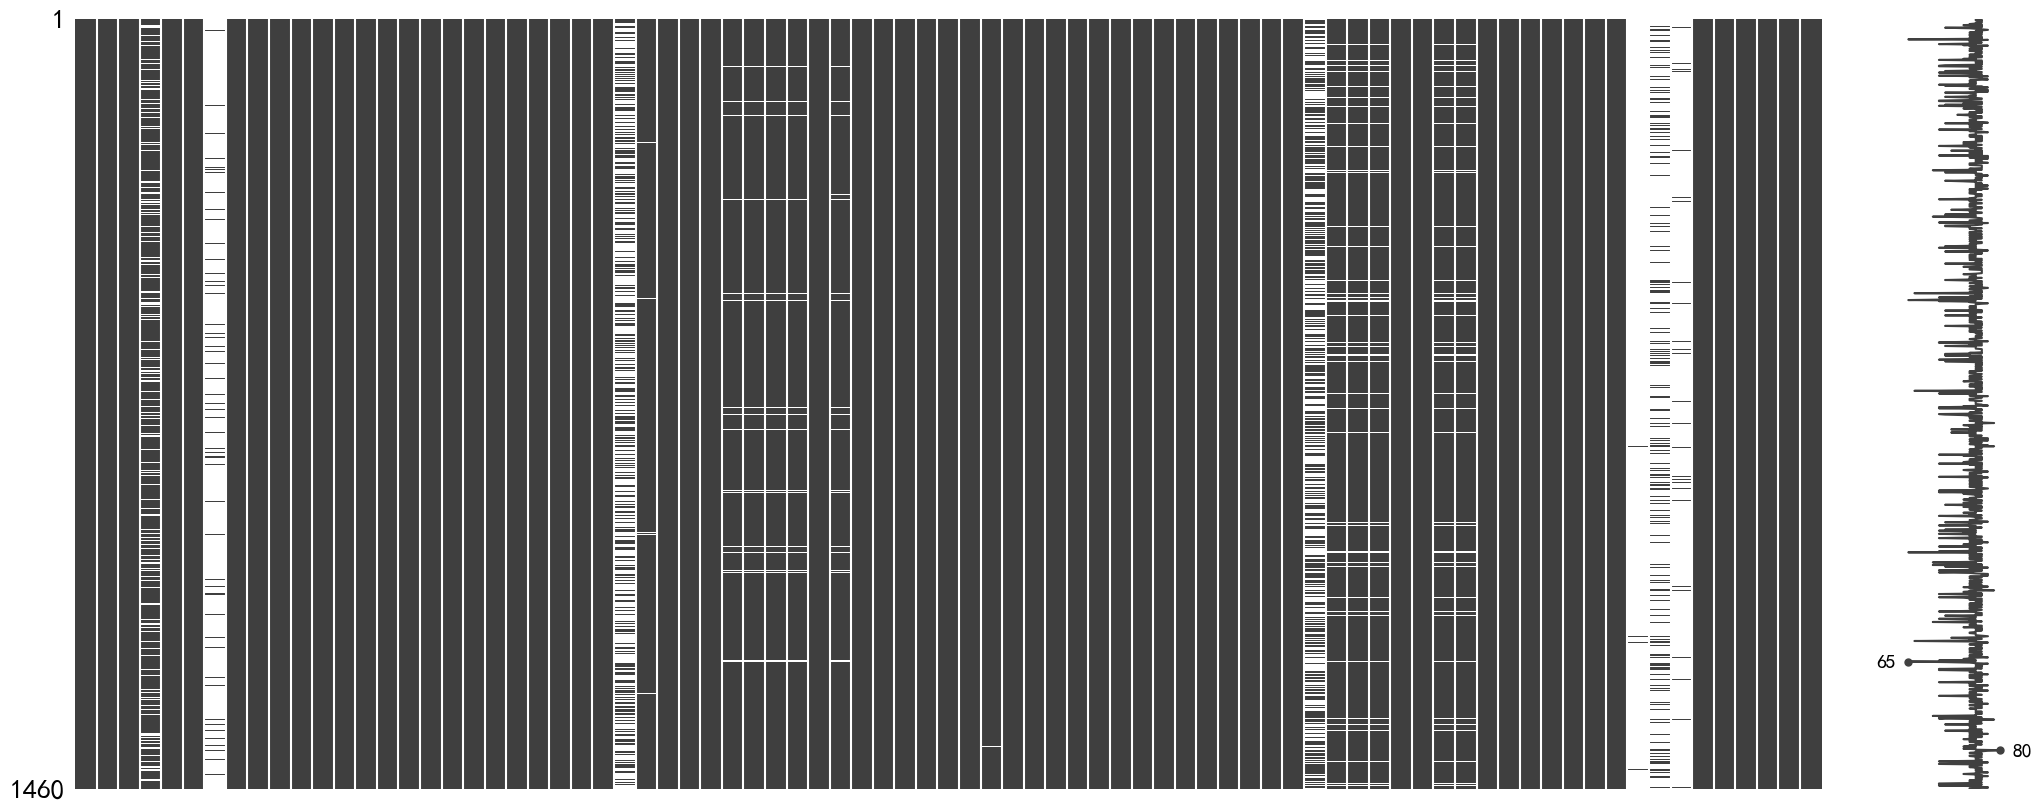

In [5]:
## 缺失值
msn.matrix(df_train)
plt.show()

In [6]:
##输出除了Id列全部是缺失值的行
empty_rows = df_train[df_train.drop(columns=['Id']).isnull().all(axis=1)]
print(empty_rows)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


In [7]:
## 数据分位数
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 对于连续型属性
- 许多“连续型”属性本质上也只是用数值在表示离散的值。比如overallqual(下图中可以看出其值是离散的)


In [8]:
draw = type_col['continue'].copy()
draw.remove('SalePrice')
draw.remove('Id')
print(draw)
print(len(draw))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
36


36


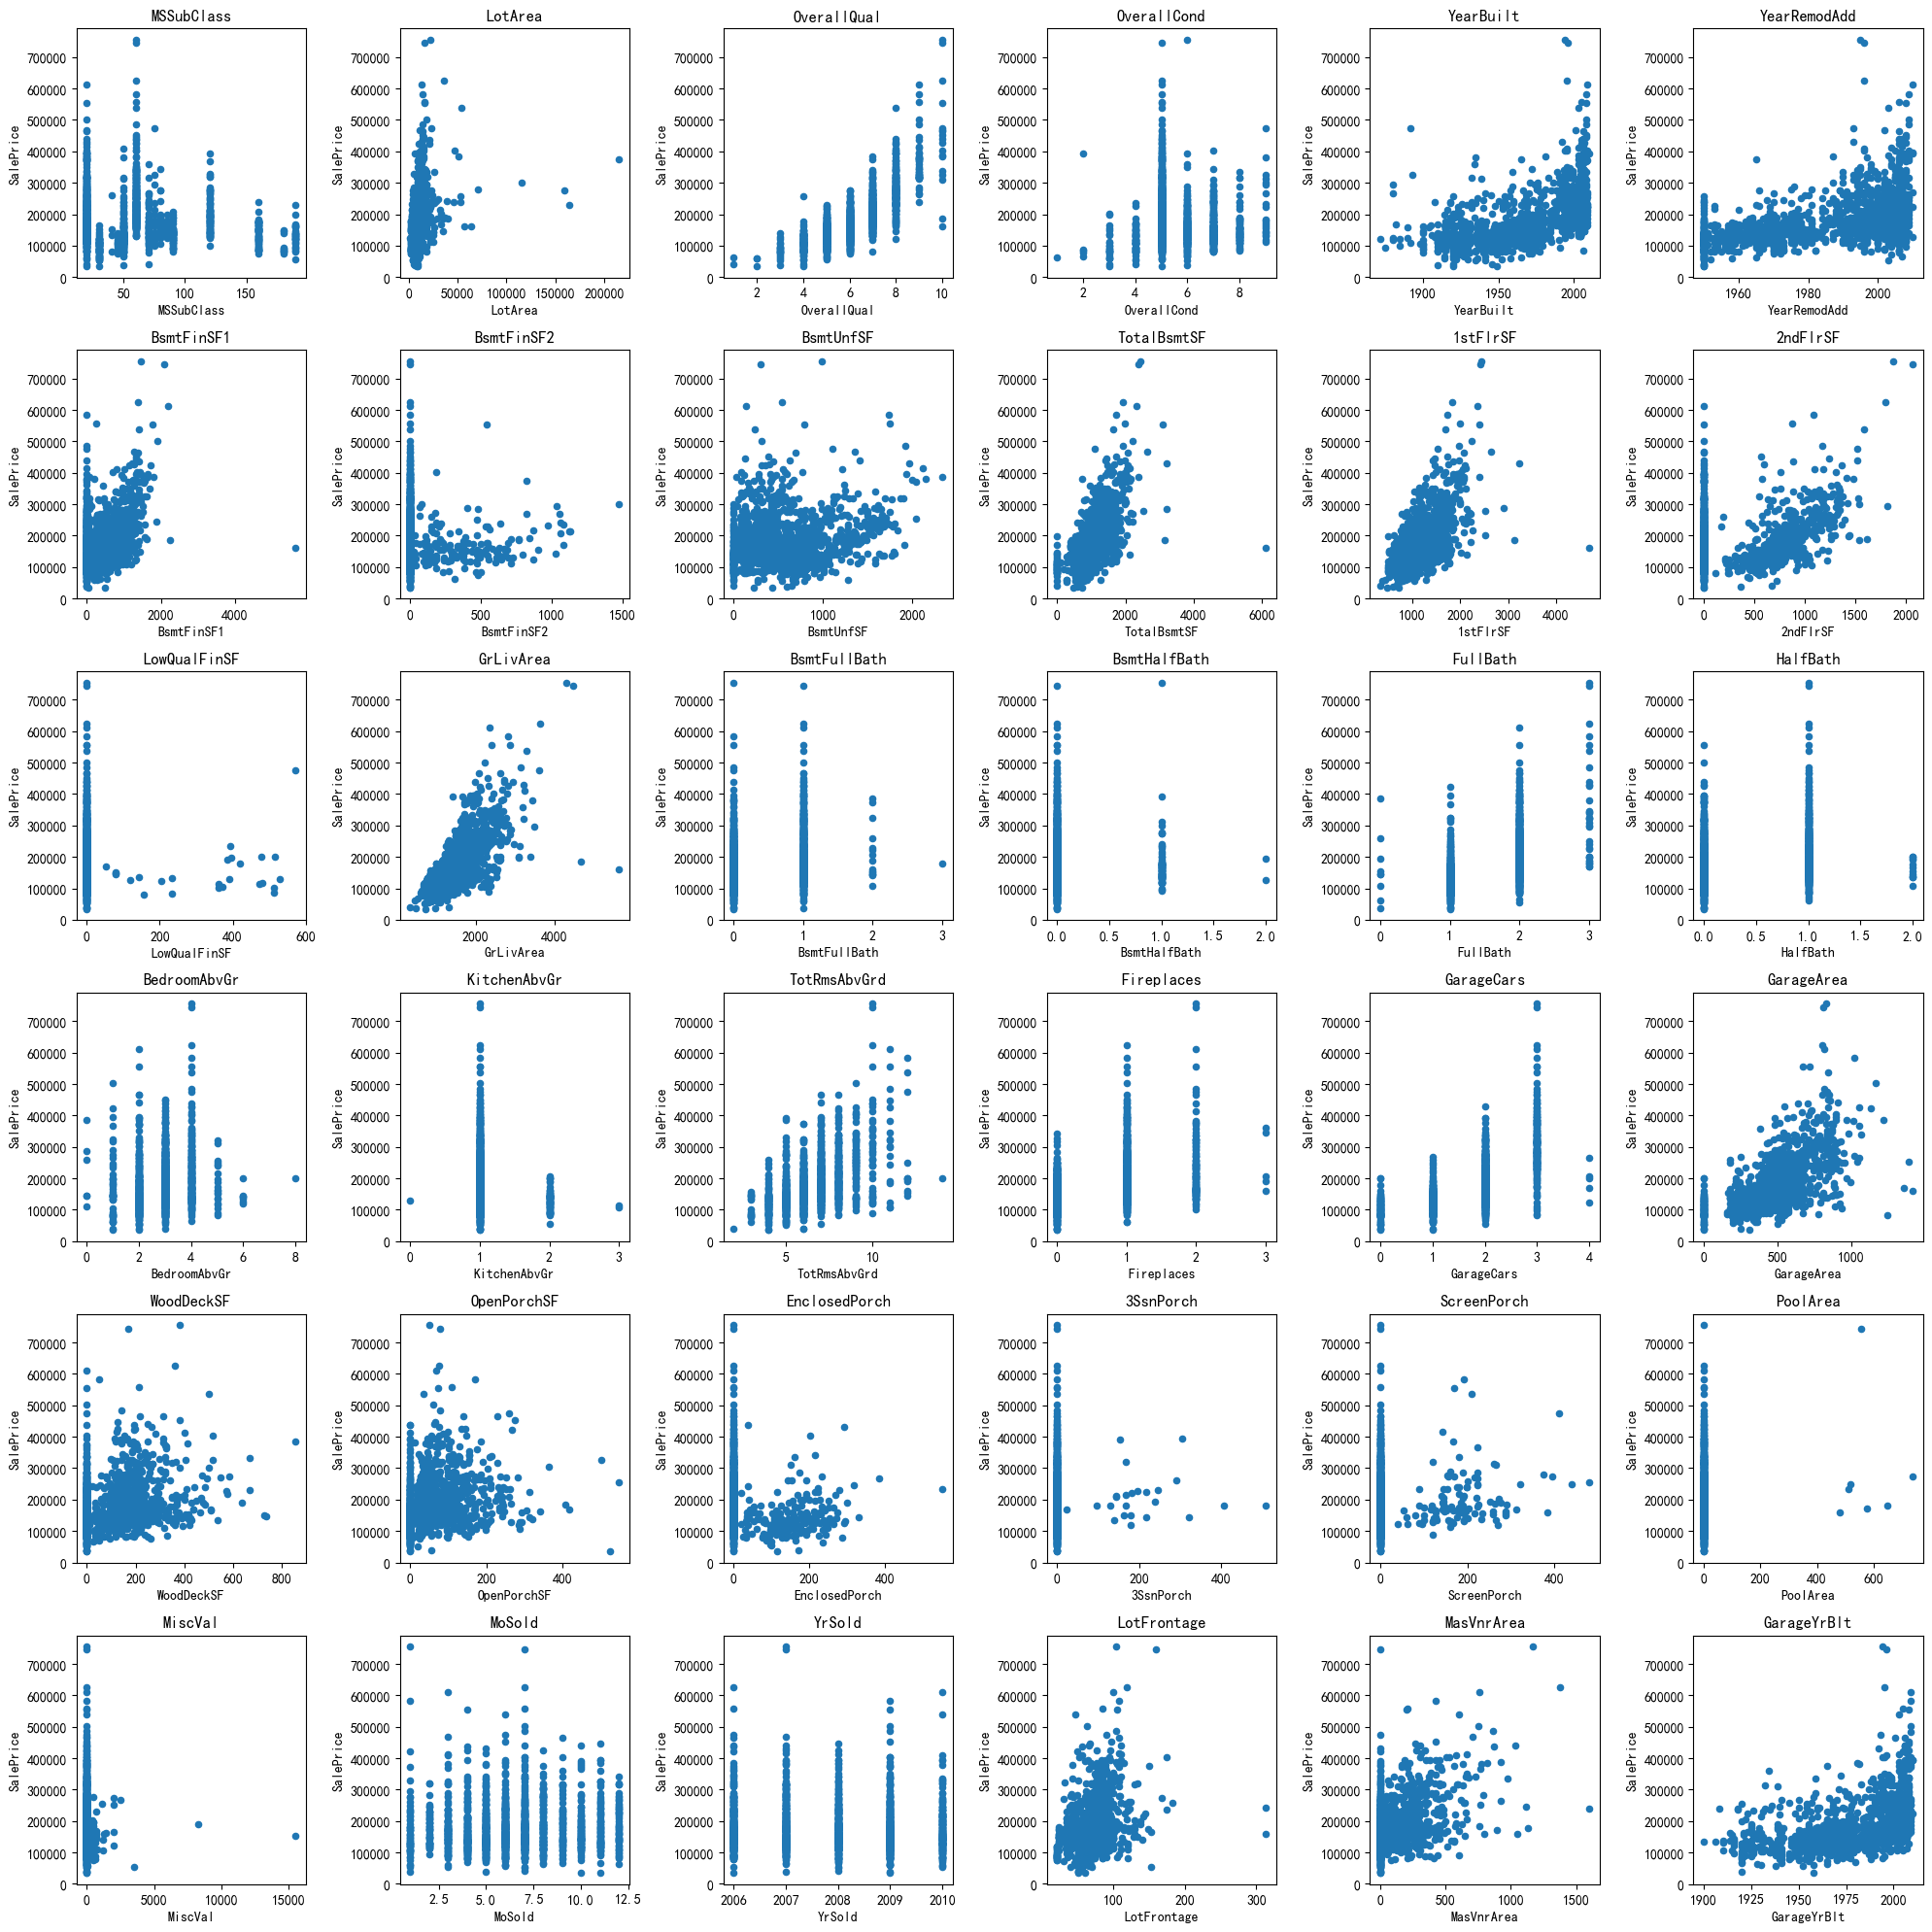

In [9]:
print(len(draw))
f = plt.figure(figsize=(20, 20))
for i in range(len(draw)):
    ax = f.add_subplot(6,6,i+1)
    df_train.plot(x=draw[i], y ='SalePrice', kind='scatter', ax=ax)
    ax.set_title(draw[i])
f.tight_layout()

#### 对于离散型变量

In [10]:
for ele in type_col['discrete']:
    print(ele, df_train[ele].value_counts().to_dict())

MSZoning {'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}
Street {'Pave': 1454, 'Grvl': 6}
Alley {'Grvl': 50, 'Pave': 41}
LotShape {'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
LandContour {'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}
Utilities {'AllPub': 1459, 'NoSeWa': 1}
LotConfig {'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4}
LandSlope {'Gtl': 1382, 'Mod': 65, 'Sev': 13}
Neighborhood {'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2}
Condition1 {'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRNn': 5, 'RRNe': 2}
Condition2 {'Norm': 1445, 'Feedr': 6, 'Artery': 2, 'RRNn': 2, 'PosN': 2, 'PosA': 1, '

## 数据处理

In [11]:
for colname in df_train.columns:
    if df_train[colname].isna().sum() != 0:
        print(df_train[colname].dtype, colname, '含有空值' ,df_train[colname].isna().sum())
        if df_train[colname].dtype == 'object':
            df_train[colname] = df_train[colname].fillna("empty")
        elif df_train[colname].dtype == 'int64' or df_train[colname].dtype == 'float64':
            df_train[colname] = df_train[colname].fillna(df_train[colname].mean())
        else:
            raise ValueError("未知数据类型")

float64 LotFrontage 含有空值 259
object Alley 含有空值 1369
object MasVnrType 含有空值 872
float64 MasVnrArea 含有空值 8
object BsmtQual 含有空值 37
object BsmtCond 含有空值 37
object BsmtExposure 含有空值 38
object BsmtFinType1 含有空值 37
object BsmtFinType2 含有空值 38
object Electrical 含有空值 1
object FireplaceQu 含有空值 690
object GarageType 含有空值 81
float64 GarageYrBlt 含有空值 81
object GarageFinish 含有空值 81
object GarageQual 含有空值 81
object GarageCond 含有空值 81
object PoolQC 含有空值 1453
object Fence 含有空值 1179
object MiscFeature 含有空值 1406


<Axes: >

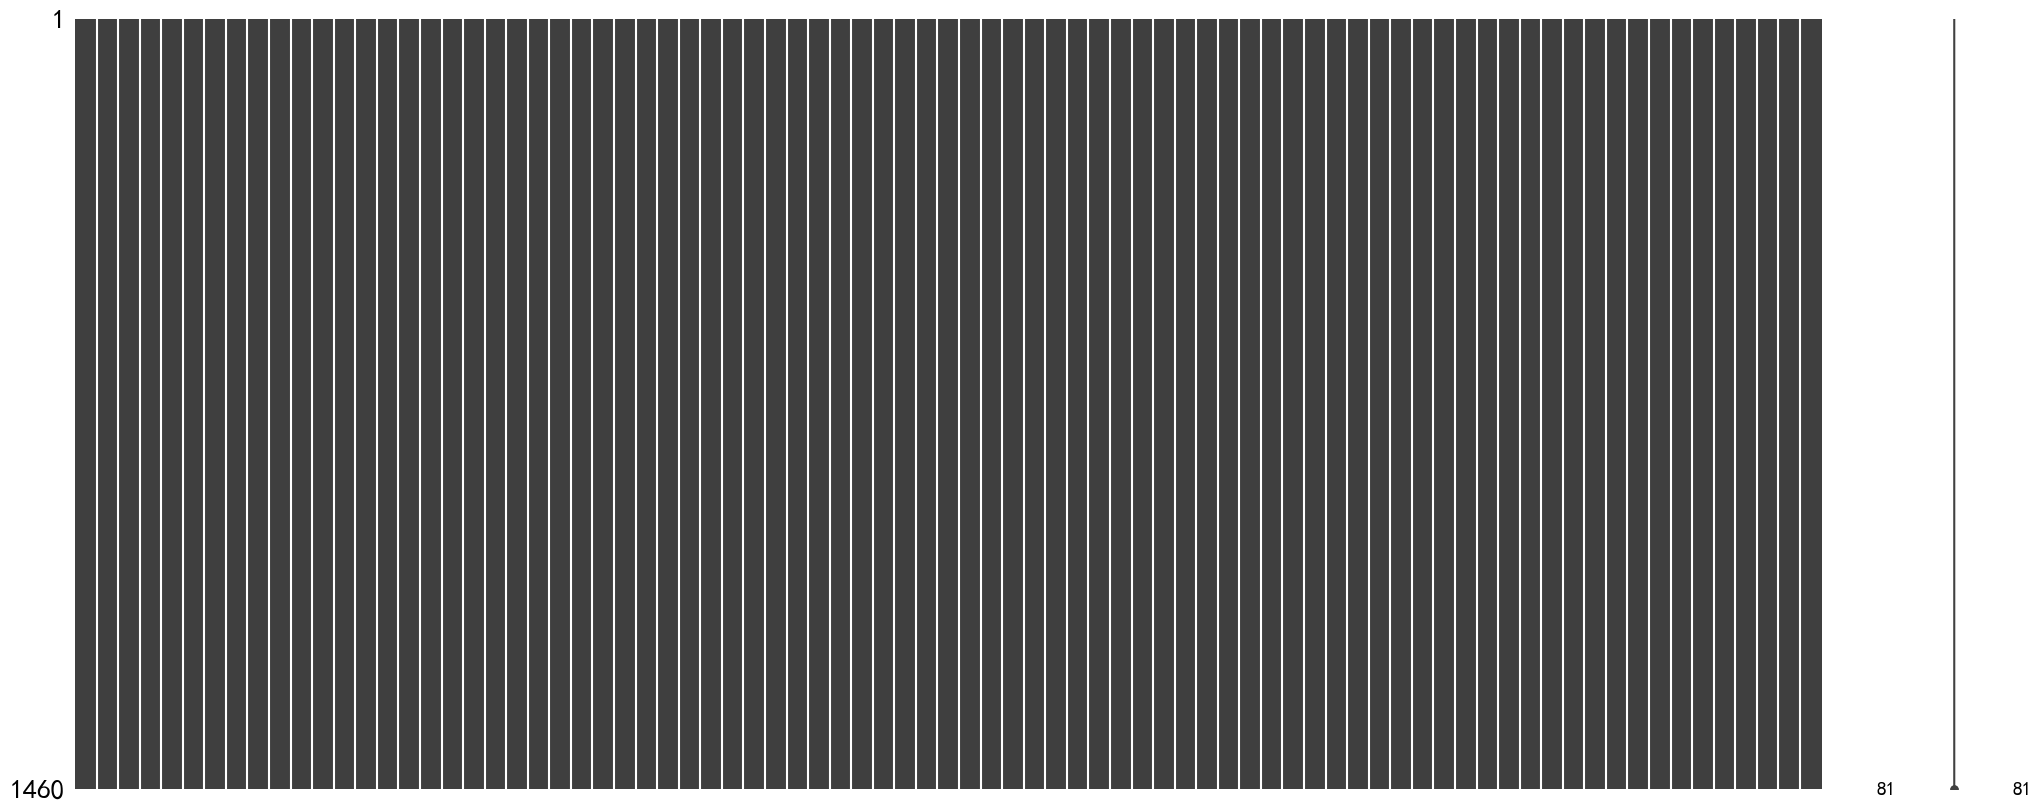

In [12]:
msn.matrix(df_train)

In [13]:
for colname in df_train.columns:
    if df_train[colname].isna().sum() != 0:
        print(df_train[colname].dtype, colname, '含有空值' ,df_train[colname].isna().sum())

In [14]:
X_train, y_train = df_train.drop(columns=['SalePrice', 'Id']), df_train['SalePrice']

In [15]:
print(type_col['continue'])
type_col['continue'].remove('SalePrice')
type_col['continue'].remove('Id')
print(type_col['continue'])

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrA

#### 对于连续型（数值型）数据进行数据标准化

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train[type_col['continue']] = scaler.fit_transform(X_train[type_col['continue']])
display(X_train[type_col['continue']].head())

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.229372,0.511418,1.021157
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.451936,-0.574410,-0.104483
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.093110,0.323060,0.937776
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.456474,-0.574410,0.812705
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.633618,1.364570,0.896086


#### 对于离散型属性onehot编码

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
print(type_col['discrete'])

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [20]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_discrete_arr = encoder.fit_transform(X_train[type_col['discrete']])
encoded_discrete_df = pd.DataFrame(encoded_discrete_arr, columns=encoder.get_feature_names_out(type_col['discrete']))
X_train = pd.concat([X_train.drop(columns=type_col['discrete']), encoded_discrete_df], axis=1)
display(X_train.head())
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 评估函数


In [21]:
def cal_acc(real:list, pred:list)->float:
    if len(real) != len(pred):
        raise ValueError("输入的长度不一致")
    N = len(real)
    summary = sum([(math.log(p)-math.log(r))**2 for p, r in zip(pred, real)])
    rmse = (summary/N)**0.5
    return rmse

## 尝试线性回归

In [22]:
from sklearn.linear_model import LinearRegression

runlinear = False
if runlinear:
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(X_train.columns)
    print(len(X_train.columns))
    y_train_pred = model.predict(X_train)
    print("\n线性回归模型参数:")
    print("截距:", model.intercept_)
    print("系数:", model.coef_)
    print(y_train[:10].to_list())
    print(y_train_pred[:10])
    print(cal_acc(y_train.to_list(), y_train_pred))
    plt.plot(range(len(y_train.to_list())), y_train.to_list(), label='real')
    plt.plot(range(len(y_train_pred)), y_train_pred, label='pred')
    plt.legend()
    plt.show()

## 随机森林

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_train_pred = model.predict(X_train)
print(cal_acc(y_train.to_list(), y_train_pred))

0.05998169944769073


## 进行PCA降维 + 随机森林
- onehot编码后维度太大

In [27]:
print(X_train.shape)

(1460, 303)


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=303)
X_train_pca = pca.fit_transform(X_train)
X_train_pca =  pd.DataFrame(X_train_pca, columns=[f'pca{i}' for i in range(303)])
X_train_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca293,pca294,pca295,pca296,pca297,pca298,pca299,pca300,pca301,pca302
0,2.213334,0.332699,-2.199116,-1.939990,0.305190,0.260058,1.192518,-1.652809,-0.194194,-0.045221,...,-1.078799e-16,-1.231033e-16,-2.954170e-17,-1.272959e-16,1.780061e-17,1.960954e-16,1.138417e-16,-8.778309e-17,-2.601803e-16,4.375584e-17
1,-0.131809,-1.233002,1.506332,-0.278139,-1.511256,-0.563135,0.498346,2.033909,2.451604,-1.362383,...,-1.771528e-16,2.937158e-17,-9.489491e-16,-4.323251e-16,-4.011653e-16,6.998359e-16,-3.812747e-16,-2.461466e-16,-5.680523e-16,-8.494778e-16
2,2.630870,0.204508,-1.775309,-1.588824,-0.477840,-0.176035,0.346901,-0.356520,-0.752657,-0.507213,...,-1.158374e-15,-3.251878e-16,4.305647e-17,-2.415385e-16,-5.642782e-16,-3.952453e-16,1.201317e-16,2.037019e-16,-1.498407e-16,-3.795293e-17
3,-0.687268,1.511248,0.769990,-0.103615,-0.094757,1.622268,-1.592644,-1.987209,-0.693430,-0.629611,...,-7.686460e-17,1.306682e-16,2.863901e-16,9.757524e-16,-4.384976e-16,-9.717568e-16,1.008688e-16,-1.492379e-16,8.211609e-17,4.210691e-16
4,5.023390,1.337376,-0.385570,-1.532799,-0.235558,-0.576058,0.413707,-0.220958,-0.345540,-1.315547,...,-4.853855e-17,5.149214e-16,-1.520178e-16,-1.714965e-16,-2.428755e-16,-1.074831e-16,3.559046e-16,3.016178e-16,5.939046e-16,3.502973e-16


#### 对于PCA的解释度进行分析
- 数据降维后发现许多维度的解释度几乎为0
- 说明数据存在大量冗余

In [30]:
explained_variance = pca.explained_variance_ratio_
print("各主成分的解释度：")
x = []
y = []
cntls = []
cnt = 0
for i, ev in enumerate(explained_variance):
    cnt += ev
    cntls.append(cnt)
    x.append(i+1)
    y.append(ev)
    print(f"主成分 {i + 1}: {ev:.4f} 累计解释度 {cnt}")

各主成分的解释度：
主成分 1: 0.1682 累计解释度 0.16817703910591686
主成分 2: 0.0712 累计解释度 0.23934291639485128
主成分 3: 0.0631 累计解释度 0.3024337477603922
主成分 4: 0.0442 累计解释度 0.3466500583925572
主成分 5: 0.0325 累计解释度 0.3791733325371973
主成分 6: 0.0266 累计解释度 0.40581251251303213
主成分 7: 0.0257 累计解释度 0.4315326753339663
主成分 8: 0.0238 累计解释度 0.45534842768735906
主成分 9: 0.0232 累计解释度 0.47853616368165564
主成分 10: 0.0228 累计解释度 0.5012892684976146
主成分 11: 0.0217 累计解释度 0.5229689346419452
主成分 12: 0.0211 累计解释度 0.5440227243157001
主成分 13: 0.0206 累计解释度 0.5646538366101749
主成分 14: 0.0202 累计解释度 0.5848739404903457
主成分 15: 0.0195 累计解释度 0.6043502550104042
主成分 16: 0.0182 累计解释度 0.6225625394598532
主成分 17: 0.0178 累计解释度 0.6404028319095014
主成分 18: 0.0173 累计解释度 0.6577400298519221
主成分 19: 0.0167 累计解释度 0.674442412385314
主成分 20: 0.0157 累计解释度 0.6901713126862092
主成分 21: 0.0146 累计解释度 0.7047764804980478
主成分 22: 0.0137 累计解释度 0.7184368286801133
主成分 23: 0.0126 累计解释度 0.7310739350494606
主成分 24: 0.0123 累计解释度 0.743401953099114
主成分 25: 0.0118 累计解释度 0.7552113076504

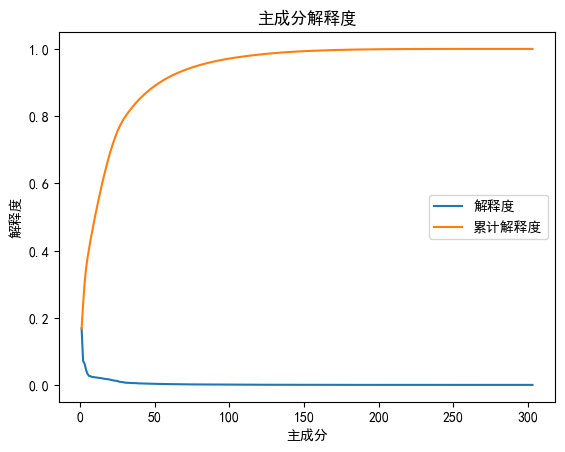

In [31]:
plt.plot(x, y, label='解释度')
plt.plot(x, cntls, label="累计解释度")
plt.xlabel('主成分')
plt.ylabel('解释度')
plt.title("主成分解释度")
plt.legend()
plt.show()

#### 参数寻找

In [32]:
from sklearn.model_selection import KFold
import itertools
from IPython.display import clear_output
kf = KFold(n_splits=5, shuffle=True) 

In [34]:
def train_k(pca_index:int=100, n_esitmate:int=100):
    global X_train_pca
    k_best_params = {'pca_index': pca_index, 'n_esitmate': n_esitmate}
    k_acc = 0
    k_best_acc = float('inf')
    k_best_model = None
    X_train_pca_index = X_train_pca.iloc[:, :pca_index]
    for idx, (train_index, test_index) in enumerate(kf.split(X_train_pca_index)):
        X_train_pca_index_fold4, X_test_pca_index_fold1 = X_train_pca_index.iloc[train_index], X_train_pca_index.iloc[test_index]
        y_train_fold4, y_test_fold1 = y_train.iloc[train_index], y_train.iloc[test_index]
        model = RandomForestRegressor(n_estimators=n_esitmate, random_state=42)
        model.fit(X_train_pca_index_fold4, y_train_fold4)
        y_test_pred_fold1 = model.predict(X_test_pca_index_fold1)
        acc = cal_acc(y_test_fold1.to_list(), y_test_pred_fold1)
        print(f"第{idx + 1}折的准确率：{acc}")
        k_acc += acc
        if acc < k_best_acc:
            k_best_acc = acc
            k_best_model = model
    print(f'平均准确率{k_acc/5}')
    return k_best_model, k_best_params , k_acc/5
    

In [35]:
pca_index_ls = [50, 60, 70, 80, 90, 100, 120, 150, 200, 303]
n_esitmate_ls = [50, 70, 100, 200, 300]
size = len(pca_index_ls) * len(n_esitmate_ls)
best_params = None
best_acc = float('inf')
best_model = None
for  idx, (pca_index, n_esitmate) in enumerate(itertools.product(pca_index_ls, n_esitmate_ls)):
    print(f"**********第{idx + 1}/{size}次参数寻找**********")
    k_best_model, k_best_params, k_acc_mean = train_k(pca_index, n_esitmate)
    if k_acc_mean < best_acc:
        best_acc = k_acc_mean
        best_params = k_best_params
        best_model = k_best_model
        print("update")
print(f"最佳参数为：{best_params}")
print(f"最佳准确率为：{best_acc}")

**********第1/50次参数寻找**********
第1折的准确率：0.12268269185553766
第2折的准确率：0.14000184852300937
第3折的准确率：0.15108160703335163
第4折的准确率：0.1521167101589058
第5折的准确率：0.16570267469486905
平均准确率0.1463171064531347
update
**********第2/50次参数寻找**********
第1折的准确率：0.14816195227393644
第2折的准确率：0.16550453488653422
第3折的准确率：0.12954414946594747
第4折的准确率：0.14810644526358052
第5折的准确率：0.13896618092283466
平均准确率0.14605665256256667
update
**********第3/50次参数寻找**********
第1折的准确率：0.14216158160412992
第2折的准确率：0.1415167167748248
第3折的准确率：0.14857946286376472
第4折的准确率：0.15210911303963046
第5折的准确率：0.14369567983651652
平均准确率0.1456125108237733
update
**********第4/50次参数寻找**********
第1折的准确率：0.16436473880787725
第2折的准确率：0.12382748275982991
第3折的准确率：0.14252675611156781
第4折的准确率：0.14292495802741392
第5折的准确率：0.14442039206537113
平均准确率0.14361286555441202
update
**********第5/50次参数寻找**********
第1折的准确率：0.13266506206282208
第2折的准确率：0.14937822346996
第3折的准确率：0.15994394876954363
第4折的准确率：0.14988330066651243
第5折的准确率：0.1351231863444287
平均准确率0.14539874426265337


#### 保存模型

In [36]:
import joblib

In [37]:
joblib.dump(best_model, 'best_RF_model.pkl')
model = joblib.load('best_RF_model.pkl')
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [39]:
print(best_acc)
print(best_params)

0.14277050570589495
{'pca_index': 60, 'n_esitmate': 70}


#### 其他

In [95]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train_pca.iloc[:, :120], y_train)
cal_acc(y_train.to_list(), model.predict(X_train_pca.iloc[:, :120]))

0.058360506202224334

## 读取测试集并对测试集进行相同的数据预处理

In [96]:
df_test = pd.read_csv('test.csv')

In [97]:
## 填补空缺值
for colname in df_test.columns:
    if df_test[colname].isna().sum() != 0:
        print(df_test[colname].dtype, colname, '含有空值' ,df_test[colname].isna().sum())
        if df_test[colname].dtype == 'object':
            df_test[colname] = df_test[colname].fillna("empty")
        elif df_test[colname].dtype == 'int64' or df_test[colname].dtype == 'float64':
            df_test[colname] = df_test[colname].fillna(df_test[colname].mean())
        else:
            raise ValueError("未知数据类型")

object MSZoning 含有空值 4
float64 LotFrontage 含有空值 227
object Alley 含有空值 1352
object Utilities 含有空值 2
object Exterior1st 含有空值 1
object Exterior2nd 含有空值 1
object MasVnrType 含有空值 894
float64 MasVnrArea 含有空值 15
object BsmtQual 含有空值 44
object BsmtCond 含有空值 45
object BsmtExposure 含有空值 44
object BsmtFinType1 含有空值 42
float64 BsmtFinSF1 含有空值 1
object BsmtFinType2 含有空值 42
float64 BsmtFinSF2 含有空值 1
float64 BsmtUnfSF 含有空值 1
float64 TotalBsmtSF 含有空值 1
float64 BsmtFullBath 含有空值 2
float64 BsmtHalfBath 含有空值 2
object KitchenQual 含有空值 1
object Functional 含有空值 2
object FireplaceQu 含有空值 730
object GarageType 含有空值 76
float64 GarageYrBlt 含有空值 78
object GarageFinish 含有空值 78
float64 GarageCars 含有空值 1
float64 GarageArea 含有空值 1
object GarageQual 含有空值 78
object GarageCond 含有空值 78
object PoolQC 含有空值 1456
object Fence 含有空值 1169
object MiscFeature 含有空值 1408
object SaleType 含有空值 1


False


<Axes: >

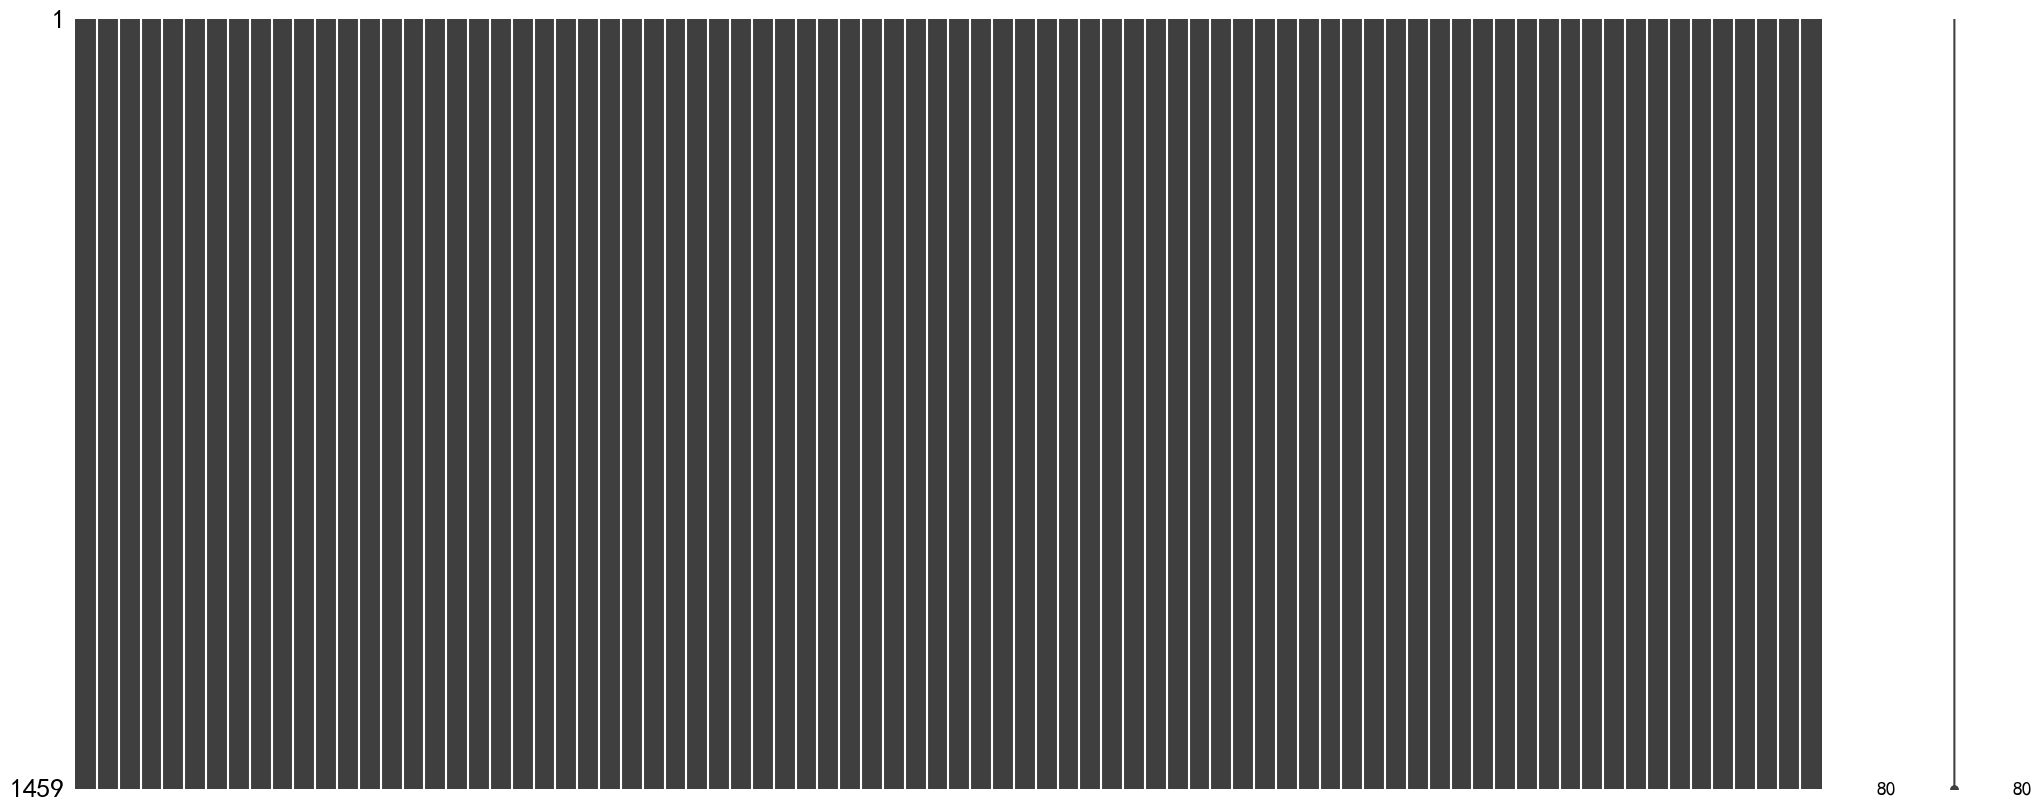

In [98]:
print('SalePrice' in df_test.columns.to_list())
msn.matrix(df_test)

In [99]:
X_test = df_test.copy().drop(columns=["Id"])

#### 对于连续型（数值型）属性

In [100]:
X_test[type_col['continue']] = scaler.transform(X_test[type_col['continue']])

In [101]:
print(X_test[type_col['continue']].head(2))

   MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   -0.872563  0.110763    -0.795151     0.381743  -0.340077      -1.15638   
1   -0.872563  0.375850    -0.071836     0.381743  -0.439440      -1.30174   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  EnclosedPorch  \
0    0.053428    0.604293  -0.672923    -0.400017  ...      -0.359325   
1    1.051363   -0.288653  -0.365032     0.619239  ...      -0.359325   

   3SsnPorch  ScreenPorch  PoolArea    MiscVal   MoSold   YrSold  LotFrontage  \
0  -0.116339     1.882709 -0.068692  -0.087688 -0.11911  1.64521     0.451936   
1  -0.116339    -0.270208 -0.068692  25.116309 -0.11911  1.64521     0.497357   

   MasVnrArea  GarageYrBlt  
0   -0.574410    -0.729838  
1    0.023903    -0.854909  

[2 rows x 36 columns]


#### 对于离散型属性

In [102]:
encoded_discrete_arr = encoder.transform(X_test[type_col['discrete']])
encoded_discrete_df = pd.DataFrame(encoded_discrete_arr, columns=encoder.get_feature_names_out(type_col['discrete']))
X_test = pd.concat([X_test.drop(columns=type_col['discrete']), encoded_discrete_df], axis=1)
display(X_test.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.872563,0.451936,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.574410,0.053428,0.604293,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.497357,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.023903,1.051363,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.179413,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.574410,0.761852,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,0.361095,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.463612,0.347326,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-1.228623,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.574410,-0.396190,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [103]:
xtrainc = X_train.columns.to_list()
xtestc = X_test.columns.to_list()

In [104]:
if len(xtrainc) == len(xtestc):
    for i in range(len(xtrainc)):
        if xtrainc[i] != xtestc[i]:
            raise ValueError("表结构不同")

In [105]:
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(1459, 303)


In [106]:
X_test_pca = X_test_pca.reshape(X_test.shape[0], -1)
print(X_test_pca.shape)
X_test_pca = X_test_pca[:, :120]
print(X_test_pca.shape)

(1459, 303)
(1459, 120)


In [107]:
y_test_pre = model.predict(X_test_pca)

C:\Users\HanFaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [108]:
y_test_id = df_test['Id'].to_list()
if len(y_test_id)!=len(y_test_pre):
    raise ValueError('')

In [109]:
res = pd.DataFrame(data={
    'Id': y_test_id,
    'SalePrice': y_test_pre
})

In [110]:
print(res.head())

     Id   SalePrice
0  1461  129236.385
1  1462  149217.960
2  1463  181651.575
3  1464  195256.175
4  1465  175905.955


In [111]:
res.to_csv(f'submission_pca_RF_n200_idx120.csv', index=False)